# Analyzing Popular App Categories on Google Play Store

The primary objective of this project is to analyze popular app categories on the Google Play Store, specifically focusing on English language apps. The goal is to understand user preferences and identify the types of apps that tend to be popular among users. As a company specializing in free apps that generate revenue through advertisements, the project aims to provide valuable insights to our development team. By discerning which categories of apps are in high demand, we aim to assist our developers in creating apps that attract a larger user base, ultimately leading to increased revenue for the company.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read dataset into pandas DataFrame objects
android_df = pd.read_csv('googleplaystore.csv' , encoding = 'UTF-8')

In [3]:
# Explore the data using pandas methods
android_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### Data Cleaning and Preprocessing:
-Address missing or inconsistent data to ensure the accuracy and reliability of the analysis.

-Remove duplicate entries and handle outliers that may affect the distribution patterns.

In [4]:
android_df["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [5]:
android_df[android_df["Category"] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
android_df[android_df["Category"] == '1.9'].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [7]:
clean_lst = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', "LIFESTYLE", 'February 11, 2018',
        '1.0.19', '4.0 and up']

In [8]:
clean_lst

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [9]:
android_df[android_df["Category"] == '1.9'] = clean_lst

In [10]:
android_category = android_df["Category"].value_counts()
android_category 

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [11]:
app_count = android_df["App"].value_counts()
app_count

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

In [12]:
app_count[app_count > 1]

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: count, Length: 798, dtype: int64

In [13]:
"Instagram" in app_count[app_count > 1].index

True

In [14]:
android_df[android_df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [15]:
duplicate_apps_df = android_df[android_df.duplicated(subset=["App"], keep=False)]

num_duplicate_apps = duplicate_apps_df['App'].nunique()
num_duplicate_apps

798

In [16]:
# Finding maximum reviews of each app
reviews_max = android_df.groupby('App')['Reviews'].max()

In [17]:
reviews_max

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [18]:
reviews_max["Instagram"]

'66577446'

In [19]:
android_clean = []

for index,row in android_df.iterrows():
    name = row['App']
    n_reviews = row['Reviews']
    if (reviews_max[name] == n_reviews):
        android_clean.append(row)

In [20]:
len(android_clean)

10056

In [21]:
android_clean = pd.DataFrame(android_clean)

In [22]:
duplicate_apps_df = android_clean[android_clean.duplicated(subset=["App"], keep=False)]

duplicate_apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [23]:
duplicate_apps_df[duplicate_apps_df["App"] == "Ebook Reader"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
4095,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up


In [24]:
android_clean = []

already_added = []

for index,row in android_df.iterrows():
    name = row['App']
    n_reviews = row['Reviews']
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(row)
        already_added.append(name)

In [25]:
android_clean = pd.DataFrame(android_clean)

In [26]:
android_clean.shape

(9660, 13)

##### Language Filtering:

Filter the dataset to include only English language apps for analysis.

In [27]:
ord("A")

65

In [28]:
ord("A")

65

In [29]:
chr(125)

'}'

In [30]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) >127:
            lst.append(False)
        else:
            lst.append(True)
    
    non_ascii = 0
    
    for j in lst:
        if j == False:
            non_ascii += 1
                    
    if non_ascii > 3:
        return False
    else:
        return True

In [31]:
android_clean["App"].apply(is_english)

0        True
2        True
3        True
4        True
5        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: App, Length: 9660, dtype: bool

In [32]:
android_english = android_clean[android_clean["App"].apply(is_english)]

In [33]:
android_english

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


##### Data Analysis:

-Conduct exploratory data analysis (EDA) to gain insights into the distribution of app categories and installations.

-Calculate average installation for each app category.

-Visualize the data through graphs and charts to identify trends and patterns.

In [34]:
android_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [35]:
android_final = android_english[android_english["Price"] == '0']

In [36]:
android_final.shape

(8863, 13)

In [37]:
android_final["Category"].value_counts(normalize = True)*100

Category
FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
A

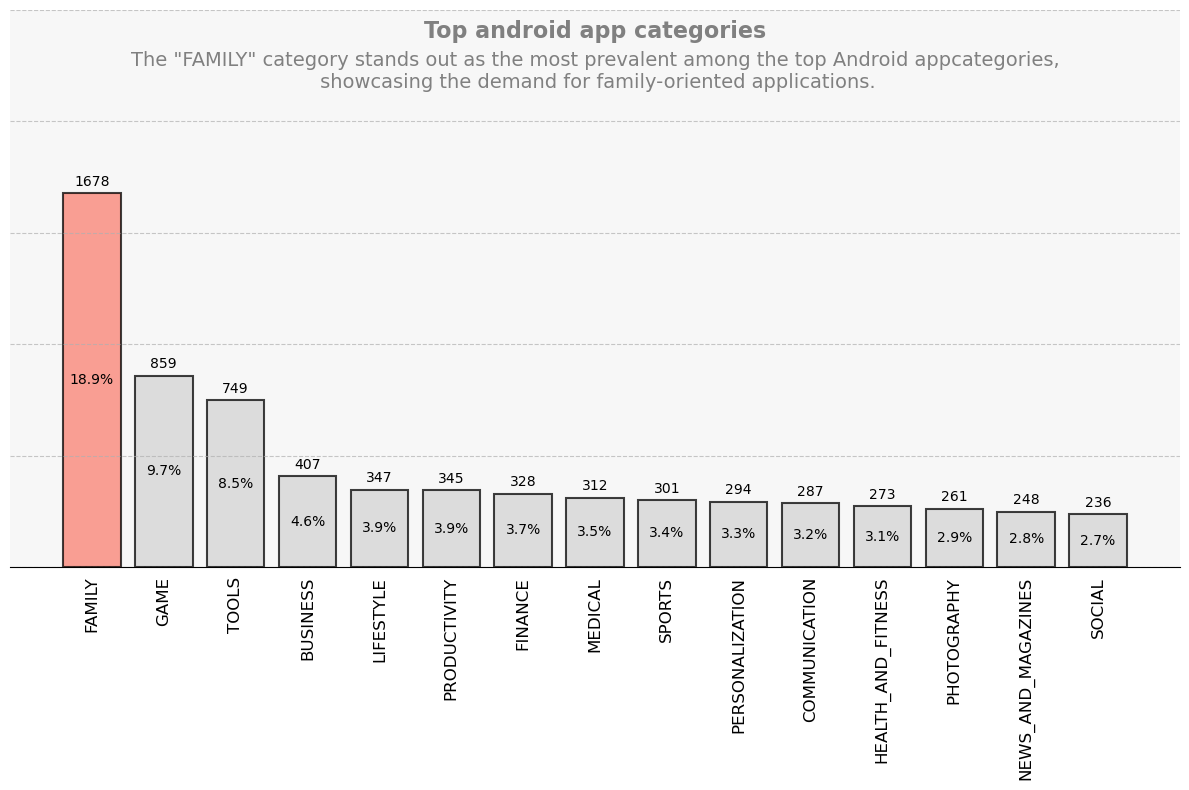

In [38]:
# Data
categories = android_final["Category"].value_counts().index[:15]
counts = android_final["Category"].value_counts().values[:15]
percentage = round(android_final["Category"].value_counts(normalize = True)*100,1)[:15]

# Create stylish bar chart
plt.figure(figsize=(12,8))
bars = plt.bar(categories, counts, color='lightgrey', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle= '')
plt.xticks(fontsize=12)
plt.yticks(range(0, 3000, 500), [],fontsize=12)
plt.tick_params(bottom = 0, left = 0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar with highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2 , f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
#Adding background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

#Adding chart title inside chart
plt.text(0.5, 0.95, 'Top android app categories', horizontalalignment='center', fontsize=16,\
         transform=plt.gca().transAxes,
        color='gray', fontweight='bold')

#Adding conclusion inside chart
plt.text(0.5, 0.86, 'The "FAMILY" category stands out as the most prevalent among the top Android app\
categories,\n showcasing the demand for family-oriented applications.',\
         horizontalalignment='center', fontsize=14, transform=plt.gca().transAxes,color='gray')

#Remove spies
for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout() # Adjust layout to prevent clipping

plt.show()


In [39]:
categories[counts.argmax()]

'FAMILY'

In [40]:
counts.argmax()

0

In [41]:
for i in bars:
    print(i.get_x() + bar.get_width()/2, i.get_height())

0.0 1678
1.0 859
2.0 749
3.0 407
4.0 347
5.0 345
6.0 328
7.0 312
8.0 301
9.0 294
10.0 287
11.0 273
12.0 261
13.0 248
14.0 236


In [42]:
"%d" % 123

'123'

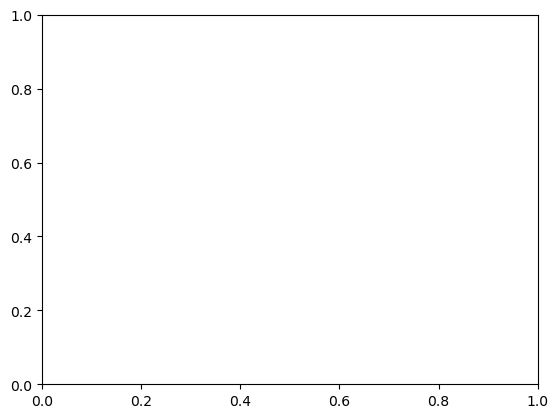

In [43]:
plt.gca().transAxes

In [44]:
android_final[android_final["Category"] == "FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [45]:
android_final["Installs"].value_counts(normalize = True)*100

Installs
1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: proportion, dtype: float64

In [46]:
android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)
android_final["Installs_int"]

C:\Users\MY PC\AppData\Local\Temp\ipykernel_16036\1898293556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)


0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_int, Length: 8863, dtype: int32

In [47]:
install_frq = android_final["Installs_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [48]:
install_frq_perc = round(android_final["Installs_int"].value_counts(normalize = True)*100,2).sort_index()
install_frq_perc = install_frq_perc[install_frq_perc.index >500]
install_frq_perc

Installs_int
1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: proportion, dtype: float64

In [49]:
# alphanumeric units i.e B = billion(1,000,000,000) M = million(1,000,000) K = thousand(1,000)
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:0f}'

In [50]:
install_frq.index

Index([      1000,       5000,      10000,      50000,     100000,     500000,
          1000000,    5000000,   10000000,   50000000,  100000000,  500000000,
       1000000000],
      dtype='int32', name='Installs_int')

In [51]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq

Installs_int
1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: count, dtype: int64

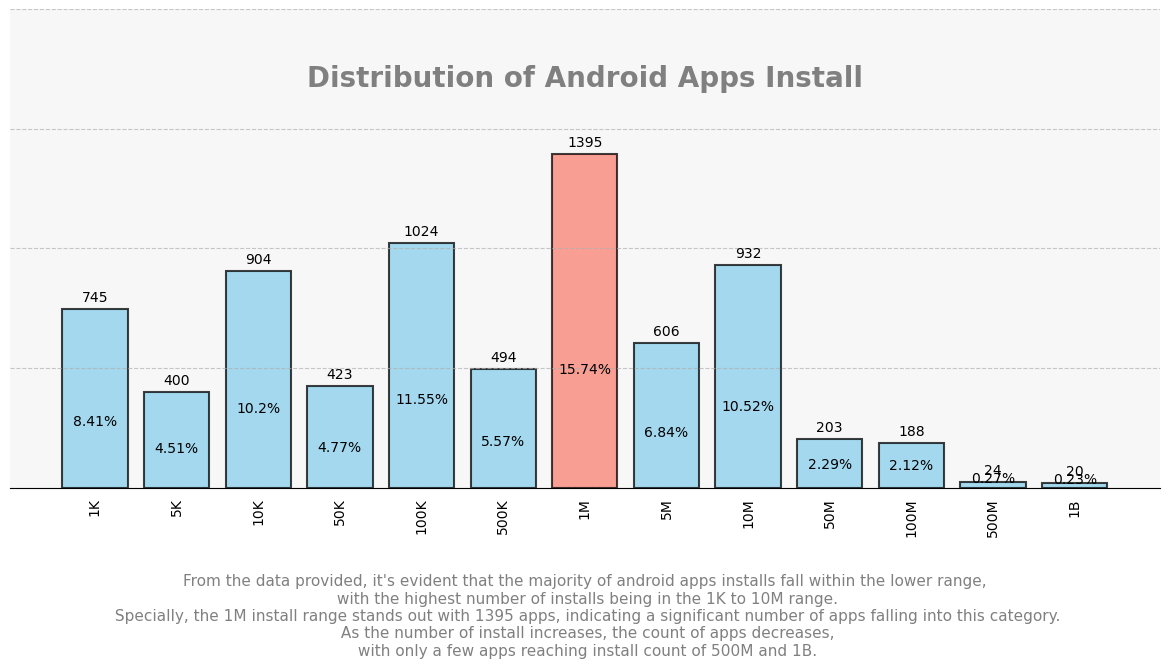

In [52]:
#Data
categories = install_frq.index
counts = install_frq.values
percentage = install_frq_perc.values

#Create stylish bar chart
plt.figure(figsize =(12,7))
bars = plt.bar(categories, counts, color='skyblue',alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='',alpha=0.7)
plt.yticks(range(0, 2500, 500), [], fontsize=12)
plt.tick_params(bottom=0, left=0)

#Find the category with highest count
max_count_category = categories[counts.argmax()]

#Highlight the bar for the category with highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

#Adding labels and percentages inside each bar
for bar, perc in zip(bars , percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d'% int(height) , ha='center' , va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/3, f'{perc}%', ha='center', va='bottom', fontsize=10, color='black')
    
#Adding background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#Adding chart title inside chart(Heading Line)
plt.text(0.5 , 0.84 , 'Distribution of Android Apps Install' , horizontalalignment='center',\
         transform=plt.gca().transAxes, 
         color='grey', fontweight='bold', fontsize=20)
         
#Adding conclusion inside chart
plt.text(0.5 , -0.35, '''From the data provided, it's evident that the majority of android apps installs fall within the \
lower range,\n with the highest number of installs being in the 1K to 10M range.\n Specially, the 1M install \
range stands out with 1395 apps, indicating a significant number of apps falling into this category.\n As the number \
of install increases, the count of apps decreases,\n with only a few apps reaching install count of 500M and 1B.''', \
         horizontalalignment='center', fontsize=11, transform=plt.gca().transAxes, color='grey')
    
#Remove spines
for i in ["top","left","right"]:
    plt.gca().spines[i].set_visible(False)
    
#adjust layout to clipping
plt.tight_layout()

plt.show()

In [53]:
categories_android = android_final["Category"].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [54]:
android_final

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,5000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,100
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,1000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1000


In [55]:
pd.pivot_table(android_final, values='Installs_int', index='Category', aggfunc='mean')

,Installs_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [56]:
#Display DataFrame without scientific notation(exponant)
pd.options.display.float_format = '{:.0f}'.format

In [57]:
categories_installs = pd.pivot_table(android_final, values='Installs_int', index='Category', aggfunc='mean')
categories_installs = categories_installs.sort_values(by="Installs_int", ascending=False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [58]:
# alphanumeric units i.e B = billion(1,000,000,000) M = million(1,000,000) K = thousand(1,000)
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:1f}'

In [59]:
categories_installs_unit = categories_installs.map(alphanumeric_units)
categories_installs_unit

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

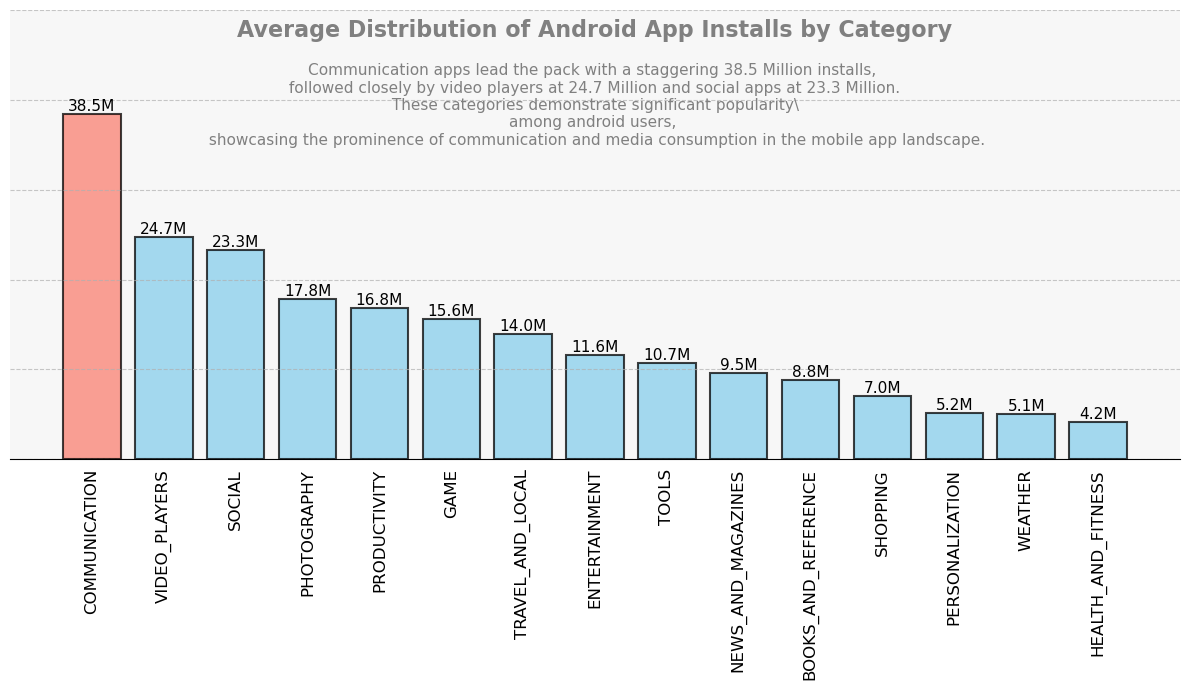

In [60]:
# Data
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

# Create a Stylish bar chart
plt.figure(figsize = (12,7))
bars = plt.bar(categories, counts, color ='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')
plt.xticks(fontsize=12)
plt.yticks(range(0, 60000000, 10000000), [], fontsize=12)
plt.tick_params(bottom=0, left=0)

# Find the category with highest count
max_category = categories[counts.argmax()]

# Highlight the bar for the category with highest count
max_count_index = list(categories).index(max_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, units in zip(bars, categories_installs_unit.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 25, units, ha='center', va='bottom', fontsize=11)
    
# Adding a background color 
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding chart title inside the chart
plt.text(0.5, 0.94, 'Average Distribution of Android App Installs by Category', horizontalalignment = 'center',\
         fontsize = 16,
         transform = plt.gca().transAxes, color='gray', fontweight='bold')

# Adding Conclusion inside the chart
plt.text(0.5, 0.7, '''Communication apps lead the pack with a staggering 38.5 Million installs, \n followed closely by \
video players at 24.7 Million and social apps at 23.3 Million. \n These categories demonstrate significant popularity\ 
among android users, \n showcasing the prominence of communication and media consumption in the mobile app landscape.''', 
        horizontalalignment='center', fontsize=11, transform = plt.gca().transAxes, color='gray')

# Removing Spines
bord = ["top","right","left"]

for i in bord:
    plt.gca().spines[i].set_visible(False)
    
# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

In [61]:
category_group = android_final.groupby("Category")

In [62]:
COMMUNICATION = category_group.get_group("COMMUNICATION").sort_values(by="Installs_int", ascending=False)
COMMUNICATION.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [63]:
# alphanumeric units
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:1f}'

In [64]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [65]:
df = COMMUNICATION[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [66]:
df = category_group.get_group("VIDEO_PLAYERS").sort_values(by="Installs_int", ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


In [67]:
df = category_group.get_group("SOCIAL").sort_values(by="Installs_int", ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
2544,Facebook,1000000000,1B
2554,Google+,1000000000,1B
2604,Instagram,1000000000,1B
2610,Snapchat,500000000,500M
2546,Facebook Lite,500000000,500M
3945,Tik Tok - including musical.ly,100000000,100M
2592,Tango - Live Video Broadcast,100000000,100M
6373,VK,100000000,100M
2552,Pinterest,100000000,100M
3951,BIGO LIVE - Live Stream,100000000,100M


In [68]:
df = category_group.get_group("PHOTOGRAPHY").sort_values(by="Installs_int", ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


##### Conclusion:
In summary, the comprehensive analysis of photography category apps illuminates a compelling trend dominated by the widespread popularity of photo-editing and collage-making applications, with several apps gamering over 100 million installs. This surge in adoption unmistakably signals a robust and growing demand for photo-related functionalities among users.

Building upon this key insight, the year 2024 holds immense promise for the development of a photo generation application. Envisioned as a tool that provides swift and free generation of pictures and photos, this innovative application is poised to seize the attention of users. By incorporating cutting-edge features, ensuring user-friendly interfaces, and delivering high-quality output, such an app stands poised to distinguish itself in the fiercely competitive market and attract a substantial user base.

The success of current photography apps, coupled with the dynamic shifts in user preferences, creates a favorable landscape for investment in the development of a photo generation app. As we anticipate the trends of 2024, seizing this opportunity appears not only strategically sound but also aligned with the evolving needs and expectations of users. The future outlook suggests that investing in a well-crafted, forward-thinking photo generation application could be the key to tapping into a lucrative market segment and establishing a significant presence in the ever-evolving world of photography apps.